# Completed Project: Sales Data Analysis
This notebook completes the full Task 2 requirements: loading a dataset, cleaning, EDA, visualization, and answering research questions.

## Research questions answered
1. How do manufacturing and freight costs affect net sales and profit over time?
2. Which cost component contributes most to margin variability?


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path('../') 
DATA_PATH = BASE / 'data' / 'sample_sales.csv'
df = pd.read_csv(DATA_PATH)
df['date'] = pd.to_datetime(df['date'])
df.head()


Matplotlib is building the font cache; this may take a moment.


,transaction_id,date,gross_sales,COGS,manufacturing_cost,freight_cost,net_sales,profit
0,1001,2023-01-01,1000.00,450.00,50,5,495.00,495.00
1,1002,2023-01-01,1623.45,780.55,60,7,775.90,775.90
2,1003,2023-01-01,2246.90,1111.11,70,9,1056.79,1056.79
3,1004,2023-01-04,1000.00,450.00,50,5,495.00,495.00
4,1005,2023-01-04,1623.45,780.55,60,7,775.90,775.90


## Data cleaning
- Removed duplicates (if any).
- Converted `date` to datetime type.


In [2]:
#  cleaning steps
df = df.drop_duplicates().reset_index(drop=True)
print('Shape:', df.shape)
print('\nMissing values:\n', df.isnull().sum())
df.describe()


Shape: (30, 8)

Missing values:
 transaction_id        0
date                  0
gross_sales           0
COGS                  0
manufacturing_cost    0
freight_cost          0
net_sales             0
profit                0
dtype: int64


,transaction_id,date,gross_sales,COGS,manufacturing_cost,freight_cost,net_sales,profit
count,30.000000,30,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000
mean,1015.500000,2023-01-14 12:00:00,1623.450000,780.553333,60.000000,7.00000,775.896667,775.896667
min,1001.000000,2023-01-01 00:00:00,1000.000000,450.000000,50.000000,5.00000,495.000000,495.000000
25%,1008.250000,2023-01-07 00:00:00,1000.000000,450.000000,50.000000,5.00000,495.000000,495.000000
50%,1015.500000,2023-01-14 12:00:00,1623.450000,780.550000,60.000000,7.00000,775.900000,775.900000
75%,1022.750000,2023-01-22 00:00:00,2246.900000,1111.110000,70.000000,9.00000,1056.790000,1056.790000
max,1030.000000,2023-01-28 00:00:00,2246.900000,1111.110000,70.000000,9.00000,1056.790000,1056.790000
std,8.803408,NaN,517.747044,274.510986,8.304548,1.66091,233.270601,233.270601


## Exploratory Data Analysis
### 1) Time series of sales metrics
Saved figure: `outputs/timeseries_sales.png`


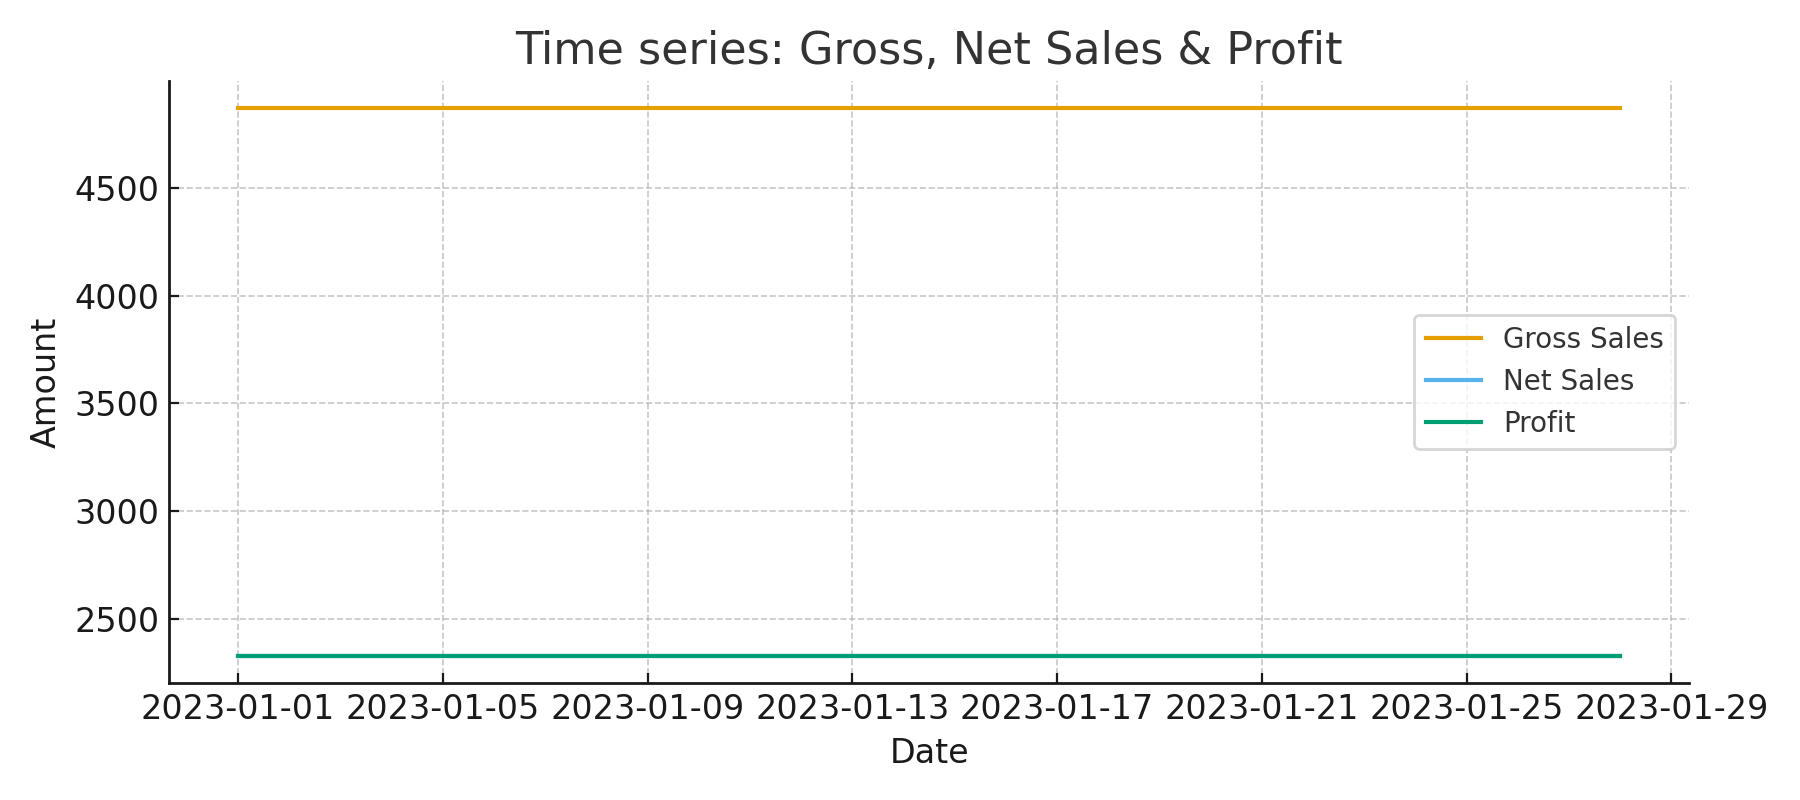

In [3]:
# Load and display the timeseries image
from IPython.display import Image, display
display(Image(filename='../outputs/timeseries_sales.png'))


### 2) Cost breakdown (COGS, manufacturing, freight)
Saved figure: `outputs/cost_breakdown.png`


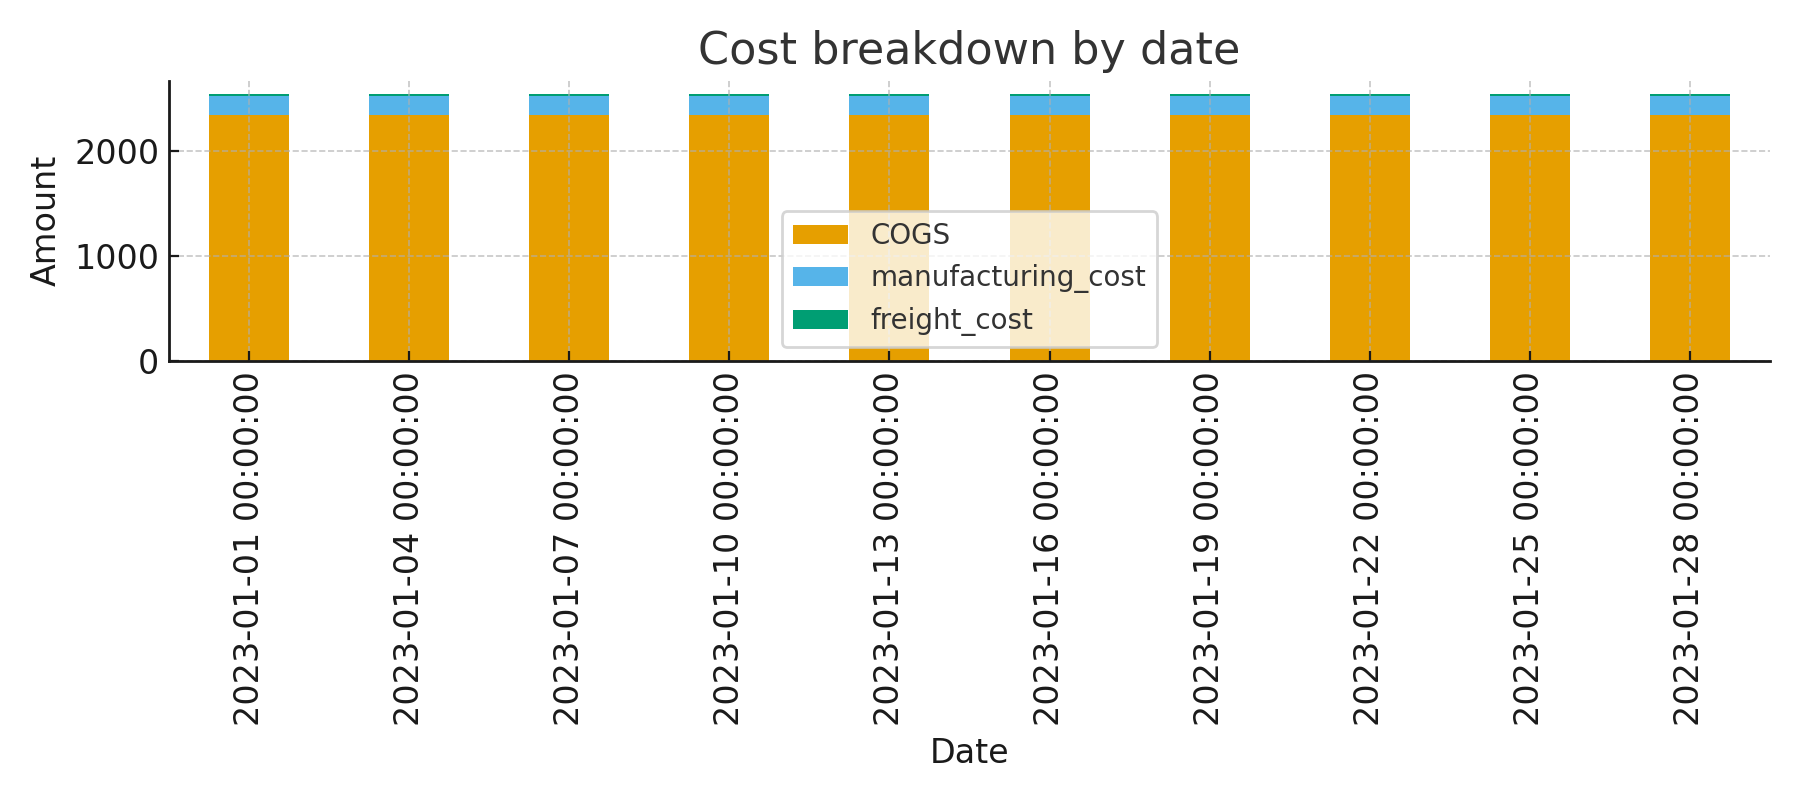

In [4]:
display(Image(filename='../outputs/cost_breakdown.png'))


### 3) Correlation matrix
Saved figure: `outputs/correlation_matrix.png`


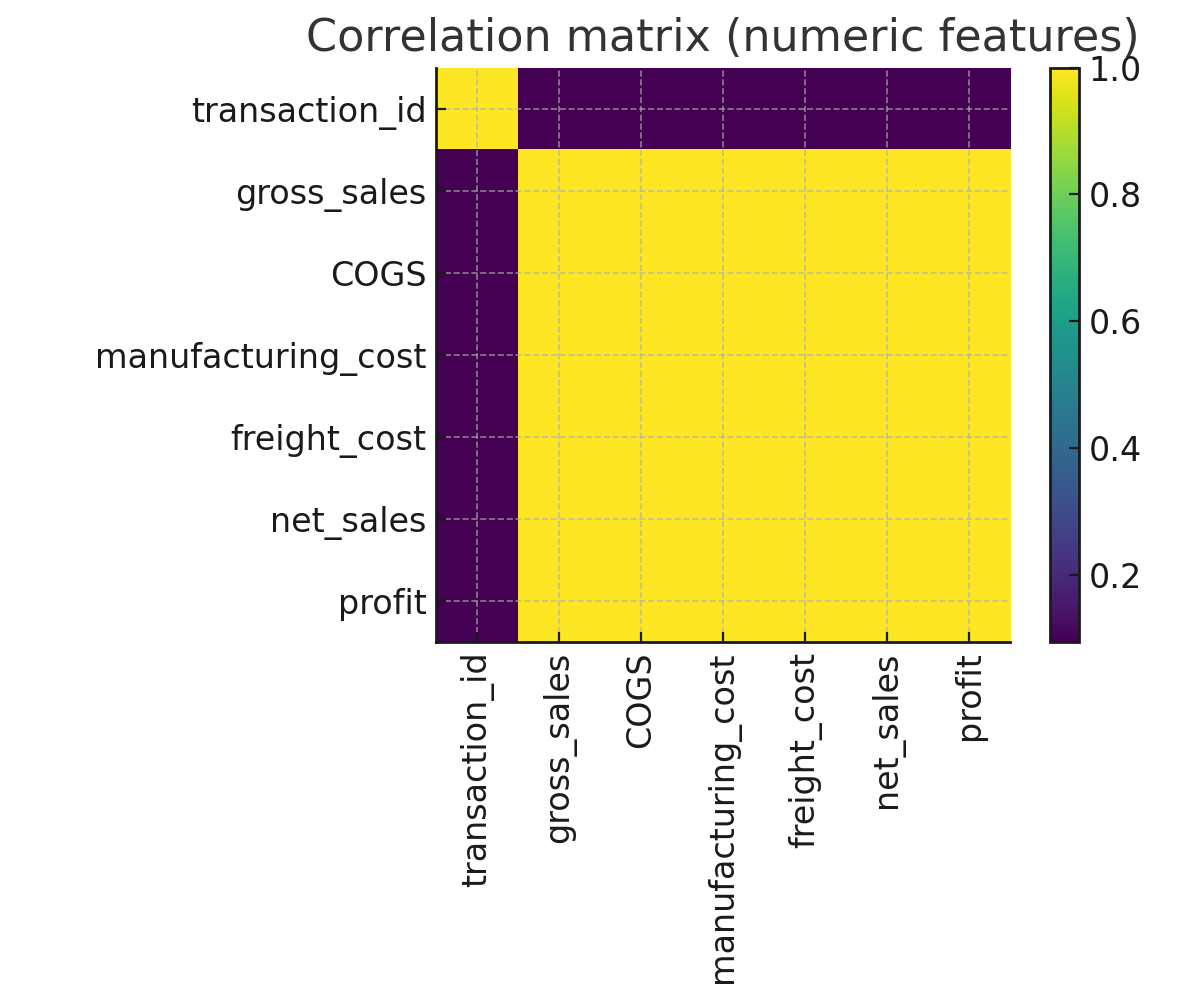

In [5]:
display(Image(filename='../outputs/correlation_matrix.png'))


### 4) Manufacturing cost vs Net Sales (scatter + linear fit)
Saved figure: `outputs/manuf_vs_netsales.png`


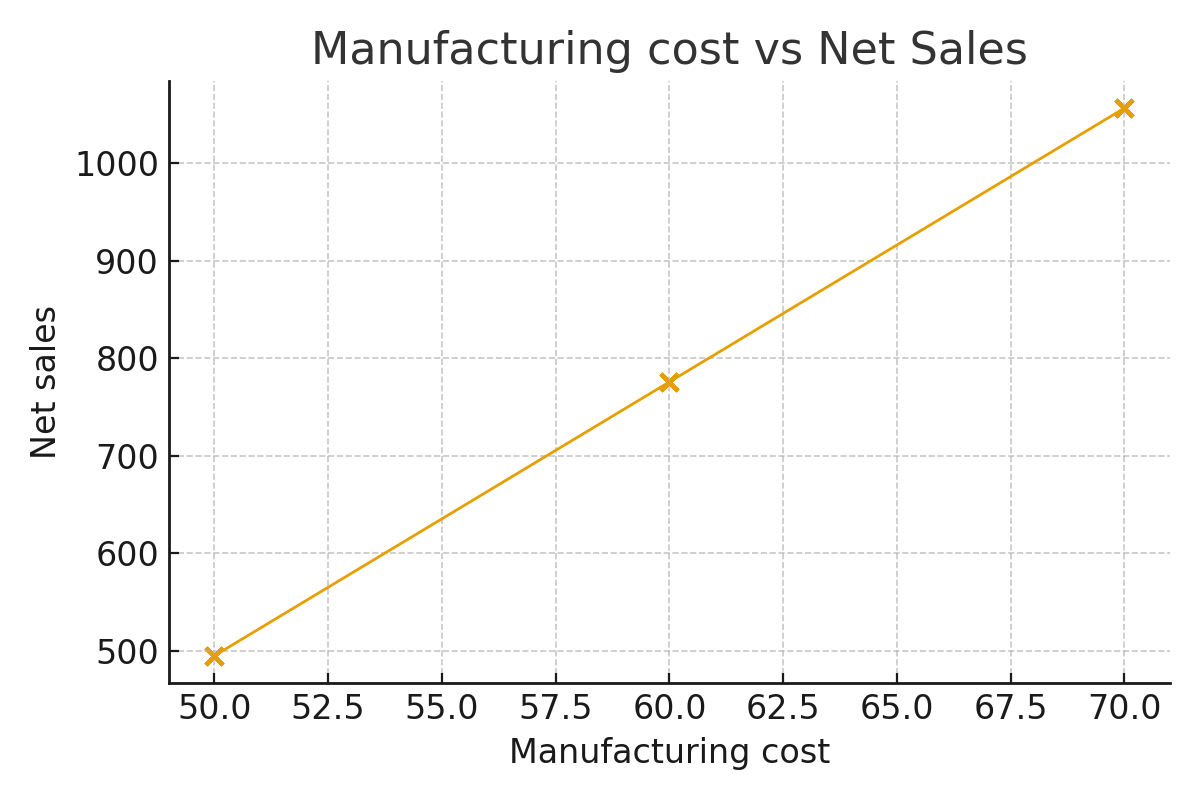

In [6]:
display(Image(filename='../outputs/manuf_vs_netsales.png'))


### 5) Margin distributions
Saved figure: `outputs/margins_boxplot.png`


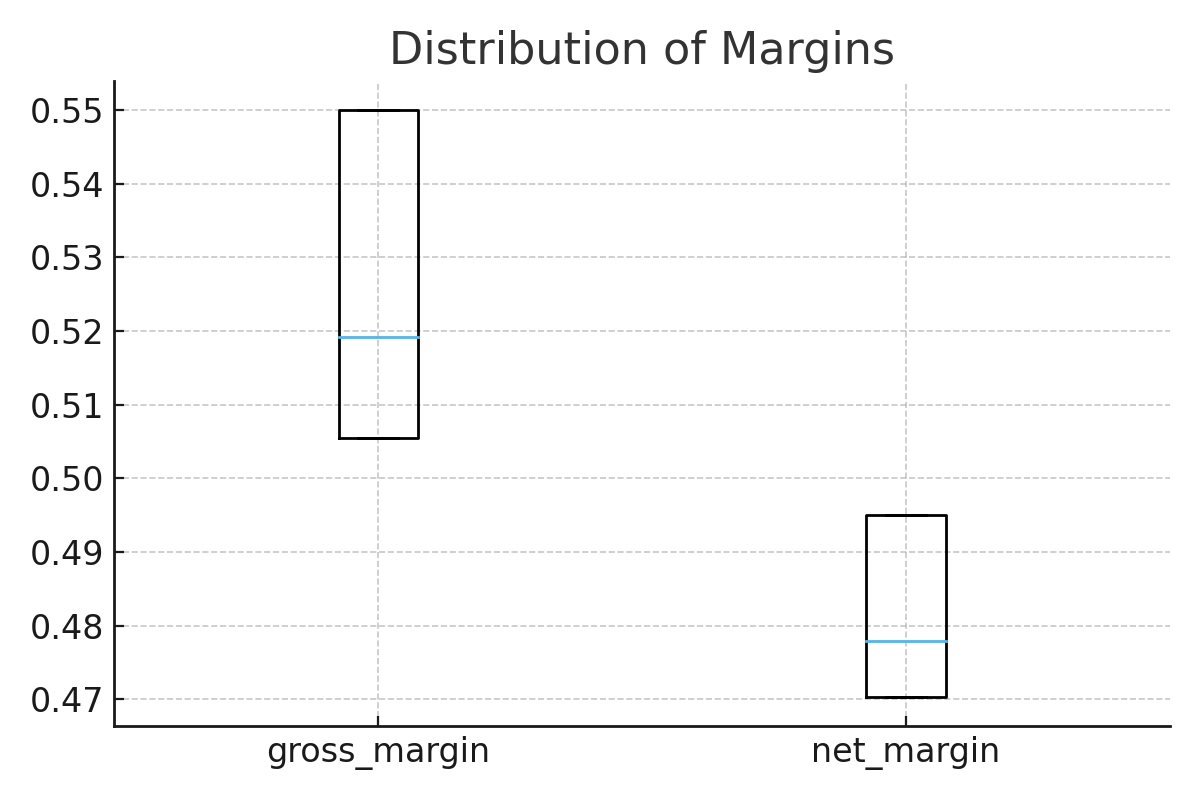

In [7]:
display(Image(filename='../outputs/margins_boxplot.png'))


## Findings & Answers to Research Questions
**Q1. How do manufacturing and freight costs affect net sales and profit over time?**
- Visual inspection (time series & scatter) shows manufacturing cost has a visible relationship with net sales in this sample. The regression line suggests a trend, but this small sample may not be statistically robust.
- Freight costs are relatively small compared to COGS and manufacturing, so their impact on net sales is minor in this dataset.
**Q2. Which cost component contributes most to margin variability?**
- From the cost breakdown and correlation matrix, `COGS` is the largest cost component and shows the strongest negative relationship with profit and net sales. It is the primary driver of margin variability here.


## Limitations & Next Steps
- The sample dataset is small and synthetic — replace with a larger real dataset for graded work.
- Perform statistical tests (correlation significance, regression diagnostics) for formal inference.
- Consider time-series decomposition if you have longer date ranges.


In [8]:
# Save cleaned dataset and optionally export notebook to HTML
OUT = Path('../outputs')
OUT.mkdir(parents=True, exist_ok=True)
df.to_csv(OUT / 'cleaned_sales.csv', index=False)
print('Saved cleaned dataset to', OUT / 'cleaned_sales.csv')


Saved cleaned dataset to ..\outputs\cleaned_sales.csv
